# archive.zip (ei file ti internet theke downloade kore nite hobe)

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('archive.zip','r')
zip_ref.extractall()
zip_ref.close()

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_ds,epochs=1,validation_data=validation_ds)

625/625 [==============================] - 5475s 9s/step - loss: 1.2075 - accuracy: 0.5745 - val_loss: 0.6093 - val_accuracy: 0.6582


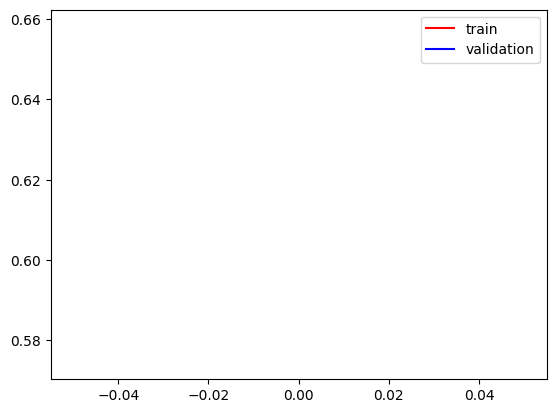

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

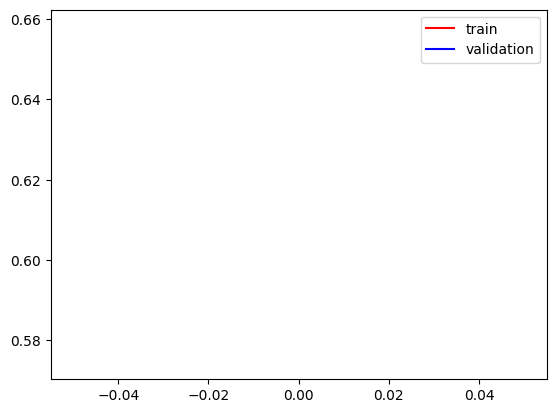

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

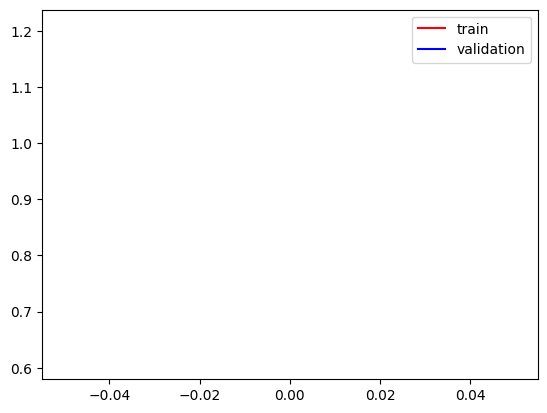

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

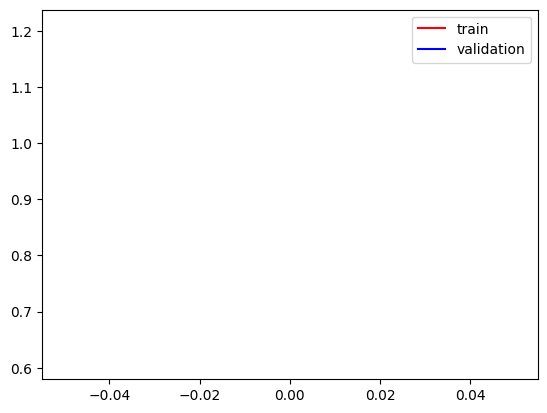

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
import cv2
import matplotlib.pyplot as plt

In [31]:
test_img = cv2.imread('my_cat.jpeg')
test_img1 = cv2.imread('my_dog.jpg')

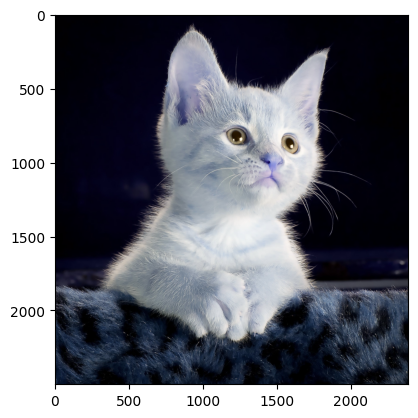

In [25]:
plt.imshow(test_img)

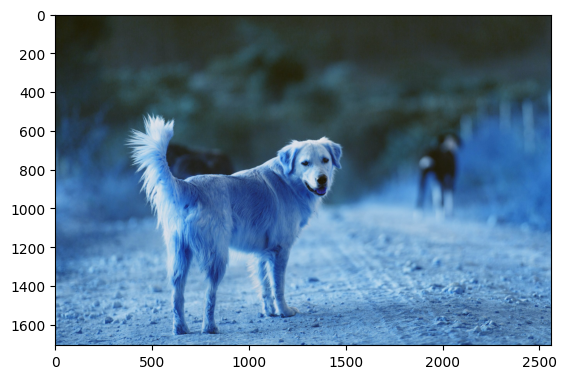

In [32]:
plt.imshow(test_img1)

In [26]:
test_img.shape

(2500, 2392, 3)

In [33]:
test_img1.shape

(1707, 2560, 3)

In [28]:
test_img = cv2.resize(test_img,(256,256))

In [34]:
test_img1 = cv2.resize(test_img1,(256,256))

In [29]:
test_input = test_img.reshape((1,256,256,3))

In [35]:
test_input1 = test_img1.reshape((1,256,256,3))

In [30]:
model.predict(test_input)

1/1 [==============================] - 1s 997ms/step


array([[1.]], dtype=float32)

In [36]:
model.predict(test_input1)

1/1 [==============================] - 1s 576ms/step


array([[0.]], dtype=float32)